In [1]:
%matplotlib notebook
import control as c
import ipywidgets as w
import numpy as np

from IPython.display import display, HTML, Math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Toggle cell visibility

from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.''')
display(tag)

# Hide the code completely

# from IPython.display import HTML
# tag = HTML('''<style>
# div.input {
#     display:none;
# }
# </style>''')
# display(tag)

## Risanje Bodejevega diagrama

V tem interaktivnem primeru bomo analizirali fazno-frekvenčne in amplitudno-frekvenčne lastnosti linearnega časovno neodvisnega (LTI) sistema v frekvenčni domeni. Te lastnosti se običajno prikaže v dveh diagramih, ki ju s skupnim imenom imenujemo Bodejev diagram. Amplitudo (izraženo v dB) in fazo (izraženo v kotnih stopinjah) vnašamo na ordinato, na absciso pa vnašamo kotno frekvenco (običajno v logaritemski skali).

Z analizo obeh diagramov je možno določiti nekatere dinamične lastnosti izbranega sistema.

<br><b>Izberi sistem!</b>

<!-- Throughout the following example, we'll analyze the phase and magnitude transfer characteristics of Linear Time-Invariant (LTI) systems in the frequency domain. These properties are usually displayed in a pair of graphs, called the Bode diagram. The magnitude is expressed in decibels, the phase in angles, and they are plotted against the angular frequency or angular frequency (usually with a logarithmic scale) of the sinusoid input signal.

By analyzing these graphs, it is possible to determine some of the dynamic properties of the systems they represent.

<br><b>Select a system type!</b> -->

In [2]:
def print_model(model):
    
    print ('\n Izbrani sistem:')

    if model == 0:
        display(Math(r'$$G(s)=\frac{s-Z}{s-P}$$'))
    elif model == 1:
        display(Math(r'$$G(s)=\frac{K_i(s-Z)}{s(s-P)}$$'))
    elif model == 2:
        display(Math(r'$$G(s)=\frac{K_d\cdot s}{(s-P)}$$'))
    elif model == 3:
        display(Math(r'$$G(s)=\frac{s-Z}{(s-P_1)(s-P_2)}$$'))
    else:
        display(Math(r'$$G(s)=\frac{s-Z}{s^2+2\zeta\omega_0s+{\omega_0}^2}$$'))
            

systemSelect = w.ToggleButtons(
    options=[('sistem prvega reda', 0), ('integracijski sistem prvega reda', 1), ('diferencirni sistem prvega reda', 2),
             ('nadkritično dušen sistem drugega reda', 3), ('podkritično dušen sistem drugega reda', 4)],
    description='Sistem: ', layout=w.Layout(width='100%'))

systemSelect.style.button_width='48%'

input_data = w.interactive_output(print_model, {'model': systemSelect})

display(systemSelect, input_data)


ToggleButtons(description='Sistem: ', layout=Layout(width='100%'), options=(('sistem prvega reda', 0), ('integ…

Output()

Bodejev diagram lahko aproksmiramo z asimptotičnimi črtami, ki jih določimo z upoštevanjem naslednjih pravil:

<b>Amplitudno-frekvenčni del Bodejevega diagrama:</b>
<ul>
    <li>
        Pri vsakem polu se naklon poveča za 20dB na dekado, pri vsaki ničli pa zmanjša za 20dB na dekado. Učinek prekrivanja polov in ničel se kombinira.
    <li>
        Začetni naklon je določen s številom ničel in polov, ki niso prikazani na diagramu (npr. v primeru integracijskih in diferencirnih komponent), in se izračuna na podlagi prejšnjega pravila. V primeru neobstoja omenjenih polov in ničel je začetni naklon vodoraven.
    </li>
    <li>
        Začetna vrednost se določi z vnosom začetne točke v naslednjo enačbo:
        <br>$M_{start}=|G(j\omega_{start})|$ where $j\omega=s$
    </li>
    <li>
        Poli in ničle, ki ležijo v desnem delu ravnine (izražajo nestabilnost) imajo nasproten učinek od ničel in polov, ki ležijo v levem delu ravnine. <i>V tem primeru ti poli in ničle niso zastopane.</i>
    </li>
</ul>
<br>
<b>Fazno-frekvenčni diagram:</b>
<ul>
    <li>
        Če je statično ojačanje (K) v funkciji oblike $G(s)= \prod{K\frac{(b_i-Z_i)}{(a_i-P_i)}}$ pozitivno, je začetna faza enaka 0°, sicer -180°.
    </li>
    <li>
        Pole in ničle, ki ležijo pred začetno točko (npr. v primeru integracijskih in diferencirnih komponent): v primeru ničel se začetna faza poveča za 90°, v primeru polov pa zmanjša za 90°.
    </li>
    <li>
        Poli zmanjšajo, ničle pa zvečajo fazo za 90°, kar se v grafu prikaže kot 45° naklon okoli njihove frekvence (z začetkom eno dekado prej in koncem dekado kasneje). Učinek prekrivanja polov in ničel se kombinira.
    </li>
    <li>
        Podobno kot v amplitudno-frekvenčnem diagramu imajo poli in ničle na desni strani kompleksne ravnine nasproten učinek kot ničle in poli, ki ležijo na levem delu ravnine. <i>V tem primeru ti poli in ničle niso zastopane.</i>
    </li>
</ul>

Realni poli in ničle so v Bodejevem diagramu prikazani v obliki njihove absolutne vrednosti, medtem ko je za konjugirane kompleksne pare, ki predstavljajo pole drugega reda, potrebno izračunati $\omega_0$. V primeru, da v Bodejev diagram vnašamo frekvenco v Hz, pa je potrebno vse vrednosti deliti z $2\pi$!

Asimptotični graf lahko nadalje izboljšamo z dodajanjem vrhov in ukrivljenostjo, vendar se bomo v tem interaktivnem primeru osredotočili na obliko, ki vključuje zgolj odsekovno ravne dele.

<b>Izberi parametre sistema; opazuj spremembe v Bodejevem diagramu!</b>
<br><b>Pri katerih vrednostih se asimptotični graf dobro ujema z dejansko karakteristiko? Zakaj?</b>

<!-- The Bode diagram can be approximated by asymptotic lines, that are easy to calculate by hand using the following rules:

<b>Magnitude plot:</b>
<ul>
    <li>
        At every pole, the slope increases, and at every zero, it decreases by 20dB. The effects of overlapping poles and zeros combine.
    <li>
        The initial slope is determined by the number of zeros and poles not shown on the plot (for example, integrating and differentiating components), calculated according to the previous rules. With no poles or zeros outside of the plotting area, the slope is horizontal.
    </li>
    <li>
        The initial value is determined by substituting the initial point into the equation:
        <br>$M_{start}=|G(j\omega_{start})|$ where $j\omega=s$
    </li>
    <li>
        Right half-plane (unstable) poles and zeros work opposite to their stable counterparts. <i>However, they are not represented in this example.</i>
    </li>
</ul>
<br>
<b>Phase plot:</b>
<ul>
    <li>
        If the static gain (K) of the function form $G(s)= \prod{K\frac{(b_i-Z_i)}{(a_i-P_i)}}$ is positive, the starting phase is 0°, otherwise -180°.
    </li>
    <li>
        Poles and zeros before the starting point (for example, integrating and differentiating components) increase (zeros) or decrease (poles) the starting phase by 90°.
    </li>
    <li>
        Poles decrease, and zeros increase the phase by 90°, which can be represented by a 45° slope around their frequency (starting a decade earlier and ending a decade later). Overlapping components combine their effects.
    </li>
    <li>
        Similarly to the magnitude plot, right half-plane (unstable) poles and zeros work opposite to their stable counterparts. <i>However, they are not represented in this example.</i>
    </li>
</ul>

Real-valued poles and zeros are represented directly on the Bode plot with their absolute values, but for complex pairs, $\omega_0$ has to be calculated, where they are represented as second-order poles. If plotting the Bode diagram's frequency axis in Hz units, all values have to be divided by $2\pi$!

The asymptotic plot can be further refined by adding peaks and curvatures, but in this example, we stick to the straight-lines only version.

<b>Select parameters for the system; observe the changes in the Bode plot!</b>
<br><b>At which positions does the asymptotic approximation fit well the original characteristics? Why?</b> -->

In [3]:
def calculate_tf(P1, P2, Z, Zb, model):
    
    if model == 0:
        if Zb:
            W = c.tf([1, Z], [1, P1])
        else:
            W = c.tf([1], [1, P1])
    elif model == 1:
        if Zb:
            W = c.tf([P2, P2*Z], [1, -P1, 0])
        else:
            W = c.tf([P2], [1, P1, 0])
    elif model == 2:
         W = c.tf([P2, 0], [1, P1])
    elif model == 3:
        if Zb:
            W = c.tf([1, Z], [1, P1+P2, P1*P2])
        else:
            W = c.tf([1], [1, P1+P2, P1*P2])
    else:
        if Zb:
            W = c.tf([1, Z], [1, 2*P1*P2, P1*P1])
        else:
            W = c.tf([1], [1, 2*P1*P2, P1*P1])

    print('\n Prenosna funkcija izbranega sistema:')
    print(W)
    
    poles, zeros = c.pzmap(W, Plot=False)
    
    print('Ničle sistema:')
    print(zeros)
    print('Poli sistema:')
    print(poles)

def draw_controllers(model):
    
    global P1_slider, P2_slider, Z_slider, Z_button

    if model == 0:
        P1_slider = w.FloatLogSlider(value=0.5, base=10, min=-3, max=3, description='pol', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        P2_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description='', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=True)
        Z_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description='ničla', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        Z_button = w.ToggleButton(value=True, description='Dodaj/odvzemi ničlo',
                               layout=w.Layout(width='auto'), disabled=False)

    elif model == 1:
        P1_slider = w.FloatLogSlider(value=0.5, base=10, min=-3, max=3, description='pol', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        P2_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description='Ki', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        Z_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description='ničla', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        Z_button = w.ToggleButton(value=True, description='Dodaj/odvzemi ničlo',
                               layout=w.Layout(width='auto'), disabled=False)

        
    elif model == 2:
        P1_slider = w.FloatLogSlider(value=0.5, base=10, min=-3, max=3, description='pol', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        P2_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description='Kd', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        Z_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description='ničla', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=True)
        Z_button = w.ToggleButton(value=True, description='Dodaj/odvzemi ničlo',
                               layout=w.Layout(width='auto'), disabled=True)
        
    elif model == 3:
        P1_slider = w.FloatLogSlider(value=0.5, base=10, min=-3, max=3, description='pol 1', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        P2_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description='pol 2', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        Z_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description='ničla', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        Z_button = w.ToggleButton(value=True, description='Dodaj/odvzemi ničlo',
                               layout=w.Layout(width='auto'), disabled=False)
        
    else:
        P1_slider = w.FloatLogSlider(value=0.5, base=10, min=-3, max=3, description=r'$\omega_0$', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        P2_slider = w.FloatLogSlider(value=1, base=10, min=-4, max=1, description=r'$\zeta$', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        Z_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description='ničla', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        Z_button = w.ToggleButton(value=True, description='Dodaj/odvzemi ničlo',
                               layout=w.Layout(width='auto'), disabled=False)
        
    
    input_data2 = w.interactive_output(calculate_tf, {'P1': P1_slider, 'P2': P2_slider, 'Z': Z_slider,
                                                      'Zb': Z_button, 'model': systemSelect})
    
    display(w.HBox([P1_slider, P2_slider, Z_button, Z_slider]), input_data2)
    
    
w.interactive_output(draw_controllers, {'model': systemSelect})

Output()

<IPython.core.display.Javascript object>


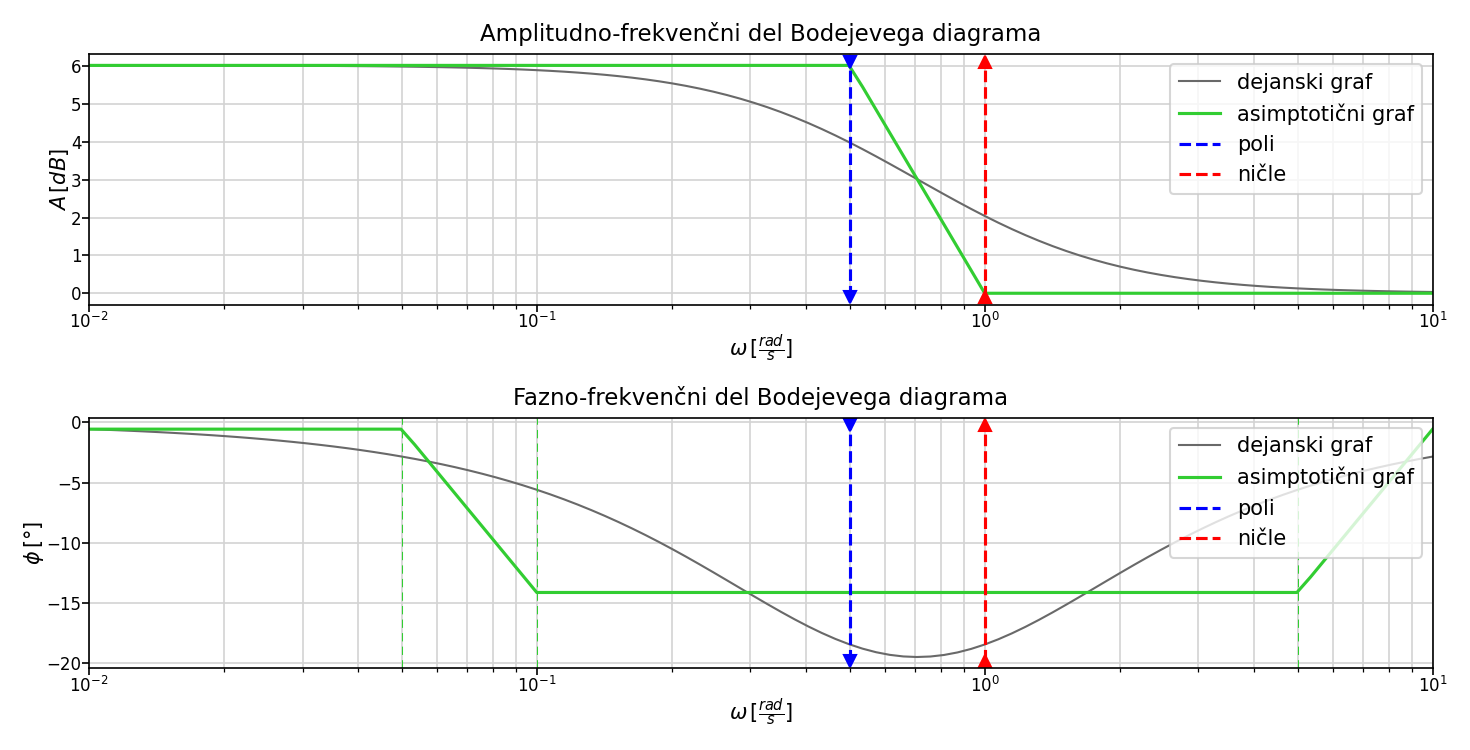

Output()

In [4]:
# Figure definition

fig1, ((f1_ax1), (f1_ax2)) = plt.subplots(2, 1, num='Slika 1')
fig1.set_size_inches((9.8, 5))
fig1.set_tight_layout(True)

f1_line1, = f1_ax1.plot([], [], lw=1, color='dimgrey')
f1_line3, = f1_ax1.plot([], [], lw=1, color='dimgrey')
f1_line2, = f1_ax2.plot([], [], lw=1.5, color='limegreen')
f1_line4, = f1_ax2.plot([], [], lw=1.5, color='limegreen')

f1_line5, = f1_ax1.plot([], [], color='blue', ls='--')
f1_line6, = f1_ax1.plot([], [], color='blue', ls='--')
f1_line7, = f1_ax1.plot([], [], color='red', ls='--')

f1_line8, = f1_ax2.plot([], [], color='blue', ls='--')
f1_line9, = f1_ax2.plot([], [], color='blue', ls='--')
f1_line10, = f1_ax2.plot([], [], color='red', ls='--')

f1_line11, = f1_ax2.plot([], [])
f1_line12, = f1_ax2.plot([], [])
f1_line13, = f1_ax2.plot([], [])
f1_line14, = f1_ax2.plot([], [])
f1_line15, = f1_ax2.plot([], [])
f1_line16, = f1_ax2.plot([], [])


f1_ax1.grid(which='both', axis='both', color='lightgray')
f1_ax2.grid(which='both', axis='both', color='lightgray')

f1_ax1.autoscale(enable=True, axis='x', tight=True)
f1_ax2.autoscale(enable=True, axis='x', tight=True)
f1_ax1.autoscale(enable=True, axis='y', tight=False)
f1_ax2.autoscale(enable=True, axis='y', tight=False)

f1_ax1.set_title('Amplitudno-frekvenčni del Bodejevega diagrama', fontsize=11)
f1_ax1.set_xscale('log')
f1_ax1.set_xlabel(r'$\omega\/[\frac{rad}{s}]$', labelpad=0, fontsize=10)
f1_ax1.set_ylabel(r'$A\/[dB]$', labelpad=0, fontsize=10)
f1_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

f1_ax2.set_title('Fazno-frekvenčni del Bodejevega diagrama', fontsize=11)
f1_ax2.set_xscale('log')
f1_ax2.set_xlabel(r'$\omega\/[\frac{rad}{s}]$', labelpad=0, fontsize=10)
f1_ax2.set_ylabel(r'$\phi\/[°]$', labelpad=0, fontsize=10)
f1_ax2.tick_params(axis='both', which='both', pad=0, labelsize=8)

f1_ax1.legend([f1_line1, f1_line2, f1_line5, f1_line7], ['dejanski graf', 'asimptotični graf', 'poli', 'ničle'], loc='upper right')
f1_ax2.legend([f1_line3, f1_line4, f1_line8, f1_line10], ['dejanski graf', 'asimptotični graf', 'poli', 'ničle'], loc='upper right')

# System model

def draw_bode(P1, P2, Z, Zb, model):

    if model == 0:
        if Zb:
            W = c.tf([1, Z], [1, P1])
        else:
            W = c.tf([1], [1, P1])
    elif model == 1:
        if Zb:
            W = c.tf([P2, P2*Z], [1, P1, 0])
        else:
            W = c.tf([P2], [1, P1, 0])
    elif model == 2:
         W = c.tf([P2, 0], [1, P1])
    elif model == 3:
        if Zb:
            W = c.tf([1, Z], [1, P1+P2, P1*P2])
        else:
            W = c.tf([1], [1, P1+P2, P1*P2])
    else:
        if Zb:
            W = c.tf([1, Z], [1, 2*P1*P2, P1*P1])
        else:
            W = c.tf([1], [1, 2*P1*P2, P1*P1])            
    
    _, _, ob = c.bode_plot(W, Plot=False)   # Small resolution plot to determine bounds
    
    mag, phase, omega = c.bode_plot(W, omega=np.logspace(np.log10(ob[0]), np.log10(ob[-1]), 100), Plot=False)   # Bode-plot         
    poles, zeros = c.pzmap(W, Plot=False) # Poles and zeros
    
    log_omega = np.log10(omega)    
    
    mag_approx = np.full_like(mag, 20 * np.log10(mag[0]))
    phase_approx = np.full_like(phase, phase[0]*180/np.pi)
    
    pole_x = []
    zero_x = []
    break_x = []
    
    for p in poles:
        if p.imag == 0:
            om = abs(p.real)
        else:
            om = np.sqrt(p.real*p.real + p.imag*p.imag)
            
        if om == 0:
            mag_approx = mag_approx - 20 * (log_omega - np.log10(omega[0]))
            phase_approx = phase_approx - 90
        else:
            mag_approx = mag_approx - 20 * np.maximum(log_omega - np.log10(om), 0)
            phase_approx = phase_approx + 45 * np.maximum(log_omega - np.log10(om) - 1, 0)
            phase_approx = phase_approx - 45 * np.maximum(log_omega - np.log10(om) + 1, 0)
            
            pole_x.append(om)
            break_x.append(om/10)
            break_x.append(om*10)
            
    for z in zeros:
        if z.imag == 0:
            om = abs(z.real)
        else:
            om = np.sqrt(z.real*z.real + z.imag*z.imag)
            
        if om == 0:
            mag_approx = mag_approx + 20 * (log_omega - np.log10(omega[0]))
            phase_approx = phase_approx + 90
        else:
            mag_approx = mag_approx + 20 * np.maximum(log_omega - np.log10(om), 0)
            phase_approx = phase_approx - 45 * np.maximum(log_omega - np.log10(om) - 1, 0)
            phase_approx = phase_approx + 45 * np.maximum(log_omega - np.log10(om) + 1, 0)
            
            zero_x.append(om)
            break_x.append(om/10)
            break_x.append(om*10)
            
    global f1_line1, f1_line2, f1_line3, f1_line4
    global f1_line5, f1_line6, f1_line7, f1_line8, f1_line9, f1_line10
    global f1_line11, f1_line12, f1_line13, f1_line14, f1_line15, f1_line16
    
    f1_ax1.lines.remove(f1_line1)
    f1_ax1.lines.remove(f1_line3)
    f1_ax2.lines.remove(f1_line2)
    f1_ax2.lines.remove(f1_line4)

    f1_line1, = f1_ax1.plot(omega, 20*np.log10(mag), lw=1, color='dimgrey')
    f1_line3, = f1_ax1.plot(omega, mag_approx, lw=1.5, color='limegreen')
    f1_line2, = f1_ax2.plot(omega, phase*180/np.pi, lw=1, color='dimgrey')   
    f1_line4, = f1_ax2.plot(omega, phase_approx, lw=1.5, color='limegreen')
    
    f1_ax1.lines.remove(f1_line5)
    f1_ax1.lines.remove(f1_line6)
    f1_ax1.lines.remove(f1_line7)
    f1_ax2.lines.remove(f1_line8)
    f1_ax2.lines.remove(f1_line9)
    f1_ax2.lines.remove(f1_line10)
    
    if len(pole_x) >= 1:
        f1_line5 = f1_ax1.axvline(pole_x[0], color='blue', ls='--', ymin=0.03, ymax=0.97, marker='v')
        f1_line8 = f1_ax2.axvline(pole_x[0], color='blue', ls='--', ymin=0.03, ymax=0.97, marker='v')
    else:
        f1_line5, = f1_ax1.plot([], [])
        f1_line8, = f1_ax2.plot([], [])
    if len(pole_x) == 2:
        f1_line6 = f1_ax1.axvline(pole_x[1], color='blue', ls='--', ymin=0.03, ymax=0.97, marker='v')
        f1_line9 = f1_ax2.axvline(pole_x[1], color='blue', ls='--', ymin=0.03, ymax=0.97, marker='v')
    else:
        f1_line6, = f1_ax1.plot([], [])
        f1_line9, = f1_ax2.plot([], [])
    if len(zero_x) == 1:
        f1_line7 = f1_ax1.axvline(zero_x[0], color='red', ls='--', ymin=0.03, ymax=0.97, marker='^')
        f1_line10 = f1_ax2.axvline(zero_x[0], color='red', ls='--', ymin=0.03, ymax=0.97, marker='^')
    else:
        f1_line7, = f1_ax1.plot([], [])
        f1_line10, = f1_ax2.plot([], [])
        
    f1_ax2.lines.remove(f1_line11)
    f1_ax2.lines.remove(f1_line12)
    f1_ax2.lines.remove(f1_line13)
    f1_ax2.lines.remove(f1_line14)
    f1_ax2.lines.remove(f1_line15)
    f1_ax2.lines.remove(f1_line16)
        
    if len(break_x) >= 1:
        f1_line11 = f1_ax2.axvline(break_x[0], color='limegreen', lw=0.5, ls=(0, (8, 5)))
        f1_line12 = f1_ax2.axvline(break_x[1], color='limegreen', lw=0.5, ls=(0, (8, 5)))
    else:
        f1_line11, = f1_ax2.plot([], [])
        f1_line12, = f1_ax2.plot([], [])
        
    if len(break_x) >= 3:
        f1_line13 = f1_ax2.axvline(break_x[2], color='limegreen', lw=0.5, ls=(0, (8, 5)))
        f1_line14 = f1_ax2.axvline(break_x[3], color='limegreen', lw=0.5, ls=(0, (8, 5)))
    else:
        f1_line13, = f1_ax2.plot([], [])
        f1_line14, = f1_ax2.plot([], [])
           
    if len(break_x) >= 5:
        f1_line15 = f1_ax2.axvline(break_x[4], color='limegreen', lw=0.5, ls=(0, (8, 5)))
        f1_line16 = f1_ax2.axvline(break_x[5], color='limegreen', lw=0.5, ls=(0, (8, 5)))
    else:
        f1_line15, = f1_ax2.plot([], [])
        f1_line16, = f1_ax2.plot([], [])

    f1_ax1.relim()
    f1_ax2.relim()
    f1_ax1.autoscale_view()
    f1_ax2.autoscale_view()
    

def link_controls(model):
    w.interactive_output(draw_bode, {'P1': P1_slider, 'P2': P2_slider, 'Z': Z_slider,
                                     'Zb': Z_button, 'model': systemSelect})
    
w.interactive_output(link_controls, {'model': systemSelect})